In [2]:
import numpy as np
import scipy.optimize
from py_vlasov.util import zp, kzkp, list_to_complex, real_imag
from py_vlasov.wrapper import oblique_wrapper
from py_vlasov.transport_ratios import input_gen, transport_ratios
from py_vlasov.follow_parameter import follow_k
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


%matplotlib inline

In [3]:
def fast_freq(k, theta, betap):
    kz, kp = kzkp(k, theta)
    cos_theta = kz / k
    kdi = k / np.sqrt(betap)
    return kdi * np.sqrt(1 + kdi**2 * cos_theta**2)

def kdi_2_krhoi(kdi, betap):
    return kdi * np.sqrt(betap)

# single k

In [4]:
betap = .1
t_list=[1.,1]
a_list=[1., 1.]
n_list=[1.,1.] 
q_list=[1.,-1.]
m_list=[1., 1./1836.]
v_list=[0.,0.]
n = 5
theta = 20.

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

NameError: name 'kz' is not defined

In [4]:
kdi = 30
k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)
fast = fast_freq(k, theta, betap)
print('guess fast mode freq = {0:.2f}'.format(fast))

f = lambda wrel:\
    real_imag(oblique_wrapper(list_to_complex(wrel), kz, kp, betap,
                              t_list, a_list, n_list, q_list, \
                              m_list, v_list, method = 'numpy', n = 10, \
                              aol=1e-4))
# guess = 1.55 - 0.01j
guess = fast
wr, wi = scipy.optimize.fsolve(f, real_imag(guess))

print(wr)
print(wi)

guess fast mode freq = 846.26
556.142177385
-4.46095472232


In [ ]:
inp = input_gen(list_to_complex([wr, wi]), kp, kz, betap)

tr = transport_ratios(inp, print_result = True);

In [ ]:
tr['eigen_e']

# Follow $k$

In [4]:
betap = 1.
t_list=[1.,1]
a_list=[1., 1.]
n_list=[1.,1.] 
q_list=[1.,-1.]
m_list=[1., 1./1836.]
v_list=[0.,0.]
n = 6
aol = 1e-4
method = 'pade'

theta = 30.

kdi = 1
k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

In [40]:
target_kdi = 10
target_k = kdi_2_krhoi(target_kdi, betap)
print('target_k = {0:.2f}'.format(target_k))
print('target_kde = {0:.3g}'.format(target_kdi / np.sqrt(1836.)))

seed_freq = fast_freq(k, theta, betap)

freq = follow_k(seed_freq, target_k, param,
                log_incrmt = 0.1, incrmt_method = 'log')

target_k = 6.00
target_kde = 0.233


/Users/Tong/Envs/science/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [6]:
freq

((82.400603190721995-3.8371037753709594j),
 (8.6602540378443873,
  4.9999999999999991,
  1.0,
  [1.0, 1],
  [1.0, 1.0],
  [1.0, 1.0],
  [1.0, -1.0],
  [1.0, 0.0005446623093681918],
  [0.0, 0.0],
  6,
  'pade',
  0.0001),
 [(1.6095996855849302-0.065893751461712863j),
  (1.8321323770554709-0.065720706443916713j),
  (2.0913941565438856-0.064580451249690182j),
  (2.3946694441022753-0.062519453182165258j),
  (2.7509845224113207-0.059779641361027133j),
  (3.1715351825760045-0.056872287173225178j),
  (3.6702065923530989-0.054642401305192392j),
  (4.2641996550094499-0.054291827790677073j),
  (4.9747538477405779-0.057328249379190593j),
  (5.8279288027121723-0.065432544248710978j),
  (6.8553964368407234-0.080293275210069626j),
  (8.0952381435586087-0.10352728195578768j),
  (9.5928541303381891-0.13682383068418266j),
  (11.402194464968183-0.18233510022079494j),
  (13.587452028623796-0.24315837449757716j),
  (16.225157267510795-0.32373994941002365j),
  (19.406526250039533-0.43017868890089989j),
  (

# Parameter conversion

$$\frac{c}{v_A} = \sqrt{\frac{m_p}{m_e}} \frac{\omega_{pe}}{\omega_{ce}}$$
$$\beta_p = \frac{v_{Tp}^2}{v_A^2} = \frac{m_e}{m_p} \frac{T_p}{T_e} \frac{v_{Te, h}^2}{v_A^2}$$

Given that $$v_{Te, h} = 0.6 c \omega_{ce} \cos\theta / \omega_{pe}$$

$$\beta_p = \frac{T_p}{T_e} 0.36 \cos{\theta}^2$$

In [20]:
theta = 30
wpe_wce = 4
the_tp = 60
fac = 0.6
# ===============

aol = 1/np.sqrt(1836)/wpe_wce
betap = 1/the_tp * np.cos(np.deg2rad(theta))**2 * fac**2

print('aol = {0:.4g}'.format(aol))
print('beta_p = {0:.4g}'.format(betap))

aol = 0.005835
beta_p = 0.0045


In [73]:
tc_th = 1e-5

t_list=[1., the_tp, the_tp * tc_th]
a_list=[1., 1., 1.]
n_list=[1.,.2,.8] 
q_list=[1.,-1., -1.]
m_list=[1., 1./1836., 1./1836]
v_list=[0.,0.,0.]
n = 6
method = 'pade'

kdi = 1

target_kde = 5
target_kdi = target_kde * np.sqrt(1836)

k = kdi_2_krhoi(kdi, betap)
kz, kp = kzkp(k, theta)

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

In [74]:
target_k = kdi_2_krhoi(target_kdi, betap)
print('target_k = {0:.2f}'.format(target_k))
print('target_kde = {0:.3g}'.format(target_kdi / np.sqrt(1836.)))

seed_freq = fast_freq(k, theta, betap)
print('seed_freq = {0:.3g}'.format(seed_freq))
freq = follow_k(seed_freq, target_k, param,
                log_incrmt = 0.01, incrmt_method = 'log')

target_k = 14.37
target_kde = 5
seed_freq = 1.32


In [75]:
freq_arr = np.array(freq[-1])
print(freq_arr[::5])

[  1.46571632e+00 -1.02413698e-03j   1.57335101e+00 -1.12894881e-03j
   1.69038614e+00 -1.24708854e-03j   1.81776281e+00 -1.38037953e-03j
   1.95651489e+00 -1.57128618e-03j   2.10791236e+00 -1.71148588e-03j
   2.27305597e+00 -1.89622641e-03j   2.45347995e+00 -2.11616434e-03j
   2.65074745e+00 -2.36614994e-03j   2.86660533e+00 -2.65061782e-03j
   3.10298961e+00 -2.97465740e-03j   3.36204321e+00 -3.34400566e-03j
   3.64613815e+00 -3.76546745e-03j   3.95789809e+00 -4.24667532e-03j
   4.30022402e+00 -4.79641602e-03j   4.67632217e+00 -5.42473998e-03j
   5.08973454e+00 -6.14312360e-03j   5.54437227e+00 -6.96465078e-03j
   6.04455207e+00 -7.90420812e-03j   6.59503610e+00 -8.97869576e-03j
   7.20107548e+00 -1.02072519e-02j   7.86845772e+00 -1.16114876e-02j
   8.60355852e+00 -1.32157264e-02j   9.41339807e+00 -1.50472416e-02j
   1.03057023e+01 -1.71364886e-02j   1.12889696e+01 -1.95173023e-02j
   1.23725423e+01 -2.22270653e-02j   1.35666853e+01 -2.53068016e-02j
   1.48826693e+01 -2.88011851e-02j

In [76]:
kde_start = kdi / np.sqrt(1836)
kde_end = np.sqrt(freq[1][0]**2 + freq[1][1]**2) /np.sqrt(1836) / np.sqrt(betap)

In [77]:
kde_list = np.logspace(np.log10(kde_start), np.log10(kde_end), len(freq_arr))

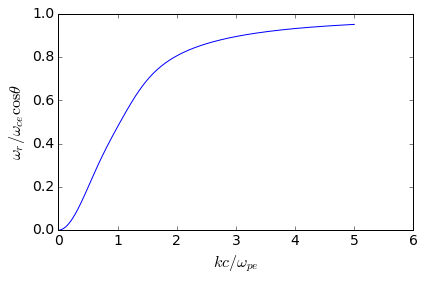

In [78]:
plt.plot(kde_list, freq_arr.real/1836/np.cos(np.deg2rad(theta)))
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_r/\omega_{ce} \cos \theta $')
plt.ylim([0, 1])
plt.tight_layout()
# plt.savefig('whistler_dispersion_real_1.png')

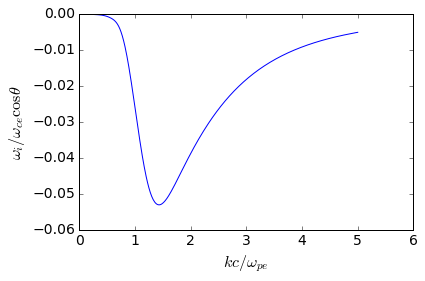

In [79]:
plt.plot(kde_list, freq_arr.imag/1836/np.cos(np.deg2rad(theta)))
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.tight_layout()
# plt.savefig('whistler_dispersion_imag_1.png')

# Transport ratios

In [80]:
k_end = np.sqrt(freq[1][0]**2 + freq[1][1]**2)
k_start = kdi_2_krhoi(kdi, betap)
k_list = np.logspace(np.log10(k_start), np.log10(k_end), len(freq_arr))

ex_ez_list = []
ey_ez_list = []
by_bx_list = []

for i in range(len(k_list)):
    freq_i = freq_arr[i]
    kz, kp = kzkp(k_list[i], theta)
    inp = input_gen(freq_i, kp, kz, betap)
    tr = transport_ratios(inp, print_result = False)
    eigen_e = tr['eigen_e']
    kvec = np.array([kp, 0, kz])
    khat = kvec/np.linalg.norm(kvec)
    ez_prime = np.dot(eigen_e, khat) * khat
    ey_prime = np.array([0, eigen_e[1], 0])
    ex_prime = eigen_e - ez_prime - ey_prime
    ex_ez = np.linalg.norm(ex_prime) / np.linalg.norm(ez_prime)
    ey_ez = np.linalg.norm(ey_prime) / np.linalg.norm(ez_prime)
    ex_ez_list.append(ex_ez)
    ey_ez_list.append(ey_ez)
    
    eigen_b = np.cross(kvec, eigen_e)
    bz_prime = np.dot(eigen_b, khat) * khat
    by_prime = np.array([0, eigen_b[1], 0])
    bx_prime = eigen_b - bz_prime - by_prime
    by_bx = np.linalg.norm(bx_prime) / np.linalg.norm(by_prime)
    by_bx_list.append(by_bx)
        

In [81]:
print(eigen_e)
print(ex_prime)
print(ez_prime)
print(ey_prime)

[ -8.09451875 +7.05419887j   0.00000000 -1.j         -11.89702373+11.91151195j]
[-0.91932667+0.13281318j  0.00000000+0.j          0.53077350-0.07667972j]
[ -7.17519208 +6.92138569j  -0.00000000 +0.j         -12.42779724+11.98819167j]
[ 0.+0.j  0.-1.j  0.+0.j]


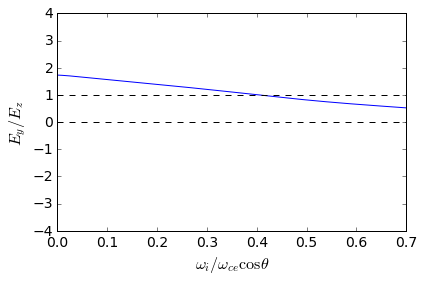

In [82]:
plt.plot(freq_arr.real/1836/np.cos(np.deg2rad(theta)), ex_ez_list, '-')
plt.xlabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.ylabel('$E_y/E_z$')
plt.axhline(1, linestyle='dashed', color='k')
plt.axhline(0, linestyle='dashed', color='k')
plt.ylim([-4, 4])
plt.xlim([0, 0.7])
plt.tight_layout()
# plt.savefig('whistler_eyez_1.png')

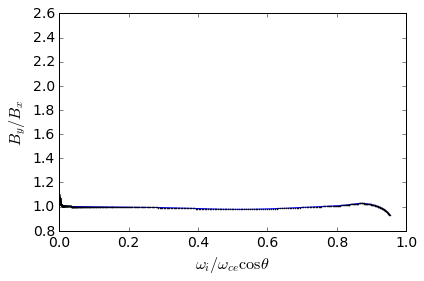

In [83]:
plt.plot(freq_arr.real/1836/np.cos(np.deg2rad(theta)), by_bx_list, '-o', markersize=1)
plt.xlabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.ylabel('$B_y/B_x$')
# plt.axhline(1, linestyle='dashed', color='k')
plt.ylim([0.8, 2.6])
plt.xlim([0, 1.])
plt.tight_layout()
# plt.savefig('whistler_byex_1.png')

In [84]:
np.save('data/whistler_freq_nh_02', freq_arr/1836/np.cos(np.deg2rad(theta)))
np.save('data/whistler_eyez_nh_02', ey_ez_list)
np.save('data/whistler_bybx_nh_02', by_bx_list)

In [86]:
np.save('data/whistler_kde', kde_list)

# Dependence on fraction of hot components

In [87]:
kde = np.load('data/whistler_kde.npy')

freq_01 = np.load('data/whistler_freq_nh_01.npy')
freq_02 = np.load('data/whistler_freq_nh_02.npy')
freq_04 = np.load('data/whistler_freq_nh_04.npy')

eyez_01 = np.load('data/whistler_eyez_nh_01.npy')
eyez_02 = np.load('data/whistler_eyez_nh_02.npy')
eyez_04 = np.load('data/whistler_eyez_nh_04.npy')

bybx_01 = np.load('data/whistler_bybx_nh_01.npy')
bybx_02 = np.load('data/whistler_bybx_nh_02.npy')
bybx_04 = np.load('data/whistler_bybx_nh_04.npy')

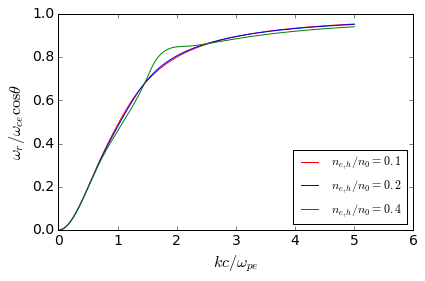

In [109]:
plt.plot(kde, freq_01.real, 'r', label=r'$n_{e,h}/n_0 = 0.1$')
plt.plot(kde, freq_02.real, 'b', label=r'$n_{e,h}/n_0 = 0.2$')
plt.plot(kde, freq_04.real, 'g', label=r'$n_{e,h}/n_0 = 0.4$')
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_r/\omega_{ce} \cos \theta $')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('whistler_dispersion_real_comparison.png')

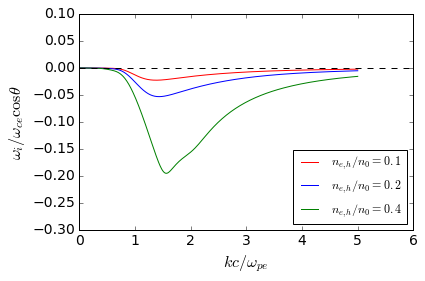

In [110]:
plt.plot(kde, freq_01.imag, 'r', label=r'$n_{e,h}/n_0 = 0.1$')
plt.plot(kde, freq_02.imag, 'b', label=r'$n_{e,h}/n_0 = 0.2$')
plt.plot(kde, freq_04.imag, 'g', label=r'$n_{e,h}/n_0 = 0.4$')
plt.xlabel('$kc/\omega_{pe}$')
plt.ylabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.ylim([-.3, 0.1])
plt.axhline(0, linestyle='dashed', color = 'k')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('whistler_dispersion_imag_comparison.png')

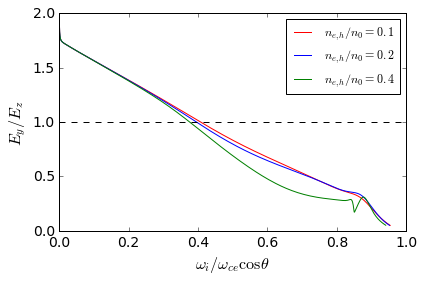

In [117]:
plt.plot(freq_01.real, eyez_01, 'r', label=r'$n_{e,h}/n_0 = 0.1$')
plt.plot(freq_02.real, eyez_02, 'b', label=r'$n_{e,h}/n_0 = 0.2$')
plt.plot(freq_04.real, eyez_04, 'g', label=r'$n_{e,h}/n_0 = 0.4$')
plt.xlabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.ylabel('$E_y/E_z$')
plt.axhline(1, linestyle='dashed', color='k')
plt.axhline(0, linestyle='dashed', color='k')
plt.ylim([0, 2])
# plt.xlim([0, 0.7])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('whistler_eyez_comparision.png')

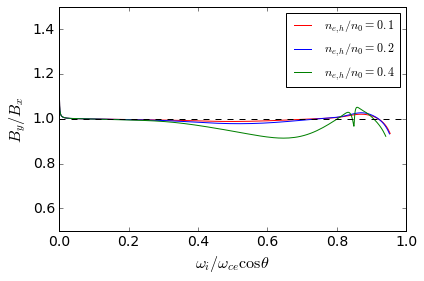

In [118]:
plt.plot(freq_01.real, bybx_01, 'r', label=r'$n_{e,h}/n_0 = 0.1$')
plt.plot(freq_02.real, bybx_02, 'b', label=r'$n_{e,h}/n_0 = 0.2$')
plt.plot(freq_04.real, bybx_04, 'g', label=r'$n_{e,h}/n_0 = 0.4$')
plt.xlabel(r'$\omega_i/\omega_{ce} \cos \theta $')
plt.ylabel('$B_y/B_x$')
plt.axhline(1, linestyle='dashed', color='k')
plt.axhline(0, linestyle='dashed', color='k')
plt.ylim([0.5, 1.5])
# plt.xlim([0, 0.7])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('whistler_bybx_comparision.png')

In [121]:
!ls figure/

whistler_bybx_comparision.png           whistler_dispersion_real_1.png
whistler_byex_1.png                     whistler_dispersion_real_comparison.png
whistler_dispersion_imag_1.png          whistler_eyez_1.png
whistler_dispersion_imag_comparison.png whistler_eyez_comparision.png
